# Import Dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from typing import Optional, Sequence, Dict, Tuple
from IPython.display import display
pd.set_option("display.max_columns", 200)
plt.rcParams['figure.figsize'] = (10,5)
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Analisis Data/Iranian Churn/Customer Churn.csv")
df_original = df.copy()
print("Shape:", df.shape)
display(df.head(5))
display(df.info())
display(df.describe(include='all').T)

Shape: (3150, 14)


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

None

,count,mean,std,min,25%,50%,75%,max
Call Failure,3150.0,7.627937,7.263886,0.0,1.00000,6.00,12.00000,36.00
Complains,3150.0,0.076508,0.265851,0.0,0.00000,0.00,0.00000,1.00
Subscription Length,3150.0,32.541905,8.573482,3.0,30.00000,35.00,38.00000,47.00
Charge Amount,3150.0,0.942857,1.521072,0.0,0.00000,0.00,1.00000,10.00
Seconds of Use,3150.0,4472.459683,4197.908687,0.0,1391.25000,2990.00,6478.25000,17090.00
Frequency of use,3150.0,69.460635,57.413308,0.0,27.00000,54.00,95.00000,255.00
Frequency of SMS,3150.0,73.174921,112.237560,0.0,6.00000,21.00,87.00000,522.00
Distinct Called Numbers,3150.0,23.509841,17.217337,0.0,10.00000,21.00,34.00000,97.00
Age Group,3150.0,2.826032,0.892555,1.0,2.00000,3.00,3.00000,5.00
Tariff Plan,3150.0,1.077778,0.267864,1.0,1.00000,1.00,1.00000,2.00


# Dataset Overview

In [3]:
def summary_columns(df, preview_n=5):
    """
    Summary per kolom:
    - Nama kolom
    - Tipe data
    - Jumlah unique
    - Preview unique values (default 5)
    - Missing values
    Selain itu print summary duplikat di dataset.

    Args:
        df (pd.DataFrame): dataframe yang ingin dianalisis
        preview_n (int): jumlah unique value yang ingin ditampilkan (default 5)

    Returns:
        pd.DataFrame: summary tabel transposenya
    """
    summary = []

    for col in df.columns:
        col_type = df[col].dtype
        n_unique = df[col].nunique()
        preview_unique = df[col].unique()[:preview_n]
        n_missing = df[col].isnull().sum()

        summary.append({
            'Kolom': col,
            'Tipe Data': col_type,
            'Jumlah Unique': n_unique,
            'Preview Unique': preview_unique,
            'Missing Values': n_missing
        })

    # Cek duplikat
    n_duplicates = df.duplicated().sum()
    print(f"🔍 Jumlah baris duplikat di DataFrame: {n_duplicates} ({n_duplicates/df.shape[0]*100:.2f}%)\n")

    df_summary = pd.DataFrame(summary)
    return df_summary

In [4]:
summary_columns(df)

🔍 Jumlah baris duplikat di DataFrame: 300 (9.52%)



,Kolom,Tipe Data,Jumlah Unique,Preview Unique,Missing Values
0,Call Failure,int64,37,"[8, 0, 10, 3, 11]",0
1,Complains,int64,2,"[0, 1]",0
2,Subscription Length,int64,45,"[38, 39, 37, 33, 36]",0
3,Charge Amount,int64,11,"[0, 1, 2, 3, 8]",0
4,Seconds of Use,int64,1756,"[4370, 318, 2453, 4198, 2393]",0
5,Frequency of use,int64,242,"[71, 5, 60, 66, 58]",0
6,Frequency of SMS,int64,405,"[5, 7, 359, 1, 2]",0
7,Distinct Called Numbers,int64,92,"[17, 4, 24, 35, 33]",0
8,Age Group,int64,5,"[3, 2, 1, 4, 5]",0
9,Tariff Plan,int64,2,"[1, 2]",0


In [5]:
sebelum = len(df)
df = df.drop_duplicates()
sesudah = len(df)
print(f"Shape after dropping duplicates: {df.shape}")

Shape after dropping duplicates: (2850, 14)


In [6]:
column_label_map: Dict[str, Dict] = {
    'Complains': {0: 'No Complaint', 1: 'Has Complaint'},
    'Churn': {0: 'Stayed', 1: 'Left'},
}
default_binary_map = {0: 'No', 1: 'Yes'}
default_palette_name = "Set2"

def _save_or_show(fig, savepath: Optional[str]):
    """Save figure (if savepath) or show it."""
    if savepath:
        fig.savefig(savepath, dpi=300, bbox_inches='tight')
        plt.close(fig)
    else:
        plt.show()

In [7]:
def plot_binary_pie(series: pd.Series,
                    title: Optional[str] = None,
                    label_map: Optional[dict] = None,
                    palette_name: str = "Set2",
                    palette: Optional[list] = None,
                    wedge_width: float = 0.5,
                    savepath: Optional[str] = None,
                    ax: Optional[plt.Axes] = None) -> Tuple[plt.Figure, plt.Axes]:
    """
    Draw pie/donut. If ax provided, draw on it and return (fig, ax).
    If ax is None, create fig/ax and either show or save depending on savepath.
    You can override colors using 'palette' (list of hex colors).
    """
    counts = series.value_counts(dropna=False)
    total = counts.sum()
    vals = counts.index.tolist()
    mapping = label_map or {}
    mapped_labels = ['Missing' if pd.isna(v) else mapping.get(v, str(v)) for v in vals]

    # gunakan palette custom jika disediakan
    if palette is not None:
        colors = palette
    else:
        n_colors = len(counts)
        colors = sns.color_palette(palette_name, n_colors=n_colors)

    created_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 5))
        created_fig = True
    else:
        fig = ax.figure

    wedges, _ = ax.pie(counts, startangle=90,
                       wedgeprops=dict(width=wedge_width),
                       colors=colors)

    for i, w in enumerate(wedges):
        ang = (w.theta2 - w.theta1) / 2. + w.theta1
        y, x = np.sin(np.deg2rad(ang)), np.cos(np.deg2rad(ang))
        ha = 'left' if x >= 0 else 'right'
        connectionstyle = f"angle,angleA=0,angleB={ang:.1f}"
        pct = counts.iloc[i] / total * 100
        label_text = f"{mapped_labels[i]} — {pct:.1f}% ({counts.iloc[i]})"
        ax.annotate(
            label_text,
            xy=(x * 0.75, y * 0.75),
            xytext=(x * 1.3, y * 1.3),
            ha=ha,
            arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle, color='gray', lw=0.8),
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=0.5),
            fontsize=9
        )

    ax.set_title(title or f"Proporsi {series.name or ''}")
    ax.axis('equal')

    if created_fig:
        _save_or_show(fig, savepath)
    return fig, ax


def plot_bar_counts(series: pd.Series,
                    title: Optional[str] = None,
                    rotate_xticks: int = 0,
                    palette_name: str = "Blues_d",
                    savepath: Optional[str] = None,
                    ax: Optional[plt.Axes] = None) -> Tuple[plt.Figure, plt.Axes]:
    vc = series.value_counts(dropna=False)
    if pd.api.types.is_integer_dtype(series) or all(isinstance(x, (int, np.integer)) for x in vc.index):
        vc = vc.sort_index()
    else:
        vc = vc.sort_values(ascending=False)

    labels = [str(x) if not pd.isna(x) else 'Missing' for x in vc.index]
    counts = vc.values
    total = counts.sum()
    pct = counts / total * 100

    created_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=(9, 5))
        created_fig = True
    else:
        fig = ax.figure

    colors = sns.color_palette(palette_name, n_colors=len(labels))
    bars = ax.bar(labels, counts, color=colors, edgecolor='k', linewidth=0.5, alpha=0.95)

    max_count = counts.max() if len(counts) > 0 else 0
    ylim_top = max(ax.get_ylim()[1], max_count * 1.12)
    ax.set_ylim(0, ylim_top)
    pad = ylim_top * 0.03

    for b, ct, p in zip(bars, counts, pct):
        x = b.get_x() + b.get_width() / 2
        y = ct
        label_out_y = y + pad
        if label_out_y + pad > ylim_top:
            label_y = y - pad; color = 'white'; va = 'top'
        else:
            label_y = label_out_y; color = 'black'; va = 'bottom'
        ax.annotate(f"{ct}\n{p:.1f}%", xy=(x, label_y), ha='center', va=va, fontsize=8,
                    bbox=dict(boxstyle="round,pad=0.2", fc='white' if color == 'black' else 'none', ec='none'),
                    color=color)

    ax.set_title(title or f"Distribusi {series.name or ''}")
    ax.set_xlabel(series.name or "")
    ax.set_ylabel("Count")
    if rotate_xticks:
        plt.setp(ax.get_xticklabels(), rotation=rotate_xticks, ha='right')
    elif len(labels) > 8:
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    if created_fig:
        _save_or_show(fig, savepath)
    return fig, ax


def plot_histogram_series(series: pd.Series,
                          title: Optional[str] = None,
                          bins: int = 30,
                          annotate_counts: bool = True,
                          savepath: Optional[str] = None,
                          ax: Optional[plt.Axes] = None) -> Tuple[plt.Figure, plt.Axes]:
    data = series.dropna()
    created_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=(9, 5))
        created_fig = True
    else:
        fig = ax.figure

    sns.histplot(data, bins=bins, kde=True, ax=ax)

    if annotate_counts:
        patches = ax.patches
        heights = [p.get_height() for p in patches]
        max_count = max(heights) if heights else 0
        ylim_top = max(ax.get_ylim()[1], max_count * 1.12)
        ax.set_ylim(0, ylim_top)
        pad = ylim_top * 0.03
        for p in patches:
            height = p.get_height()
            x = p.get_x() + p.get_width() / 2
            label_out_y = height + pad
            if label_out_y + pad > ylim_top:
                label_y = height - pad; color = 'white'; va = 'top'
            else:
                label_y = label_out_y; color = 'black'; va = 'bottom'
            if int(height) > 0:
                ax.annotate(f"{int(height)}", xy=(x, label_y), ha='center', va=va, fontsize=7,
                            color=color, bbox=dict(boxstyle="round,pad=0.12", fc='white' if color=='black' else 'none', ec='none'))

    if not data.empty:
        _mean = data.mean(); _med = data.median()
        ax.axvline(_mean, color='orange', linestyle='--', linewidth=1)
        ax.axvline(_med, color='green', linestyle=':', linewidth=1)
        ypos_label = ax.get_ylim()[1] * 0.92
        ax.text(_mean, ypos_label, f"Mean: {_mean:.1f}", rotation=90, color='orange', va='top', ha='right', fontsize=8,
                bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.9))
        ax.text(_med, ypos_label, f"Median: {_med:.1f}", rotation=90, color='green', va='top', ha='right', fontsize=8,
                bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.9))

    ax.set_title(title or f"Distribusi {series.name or ''}")
    ax.set_xlabel(series.name or "")
    ax.set_ylabel("Count")
    plt.tight_layout()
    if created_fig:
        _save_or_show(fig, savepath)
    return fig, ax

'# Example A: 2x2 grid using different plot types\ndef example_subplot_grid(df: pd.DataFrame):\n    fig, axes = plt.subplots(2, 2, figsize=(12, 9))\n    axes = axes.reshape(2, 2)\n\n    # top-left: binary pie (on ax)\n    plot_binary_pie(df[\'Churn\'], title="Churn Proporsi", label_map=column_label_map.get(\'Churn\'), ax=axes[0, 0])\n\n    # top-right: bar counts for a low-card col\n    plot_bar_counts(df[\'SomeCategoryCol\'], title="Some Category", rotate_xticks=45, ax=axes[0, 1])\n\n    # bottom-left: histogram numeric col\n    plot_histogram_series(df[\'Customer Value\'], title="Customer Value", bins=30, ax=axes[1, 0])\n\n    # bottom-right: another numeric\n    plot_histogram_series(df[\'AnotherNumeric\'], title="Another Numeric", bins=25, ax=axes[1, 1])\n\n    fig.suptitle("Dashboard: Quick Profile (2x2)", fontsize=14)\n    plt.tight_layout(rect=[0, 0.03, 1, 0.97])\n    plt.show()\n\n\n# Example B: 1 x 3 panels\ndef example_row_panels(df: pd.DataFrame):\n    fig, axes = plt.subplo

## How big is the churn problem?

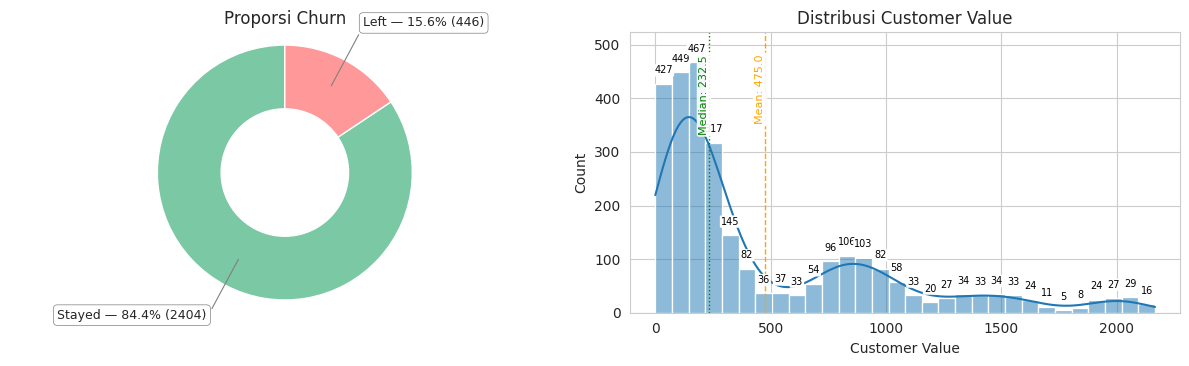

In [8]:
# @title Proporsi Churn dan Distribusi Customer Value
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes = axes.reshape(1, 2)

plot_binary_pie(df['Churn'], title="Proporsi Churn", label_map=column_label_map.get('Churn'), palette=['#7BC8A4', '#FF9999'], ax=axes[0, 0])
plot_histogram_series(df['Customer Value'], title="Distribusi Customer Value", bins=30, ax=axes[0, 1])
#fig.suptitle("Dashboard: Quick Profile (2x2)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

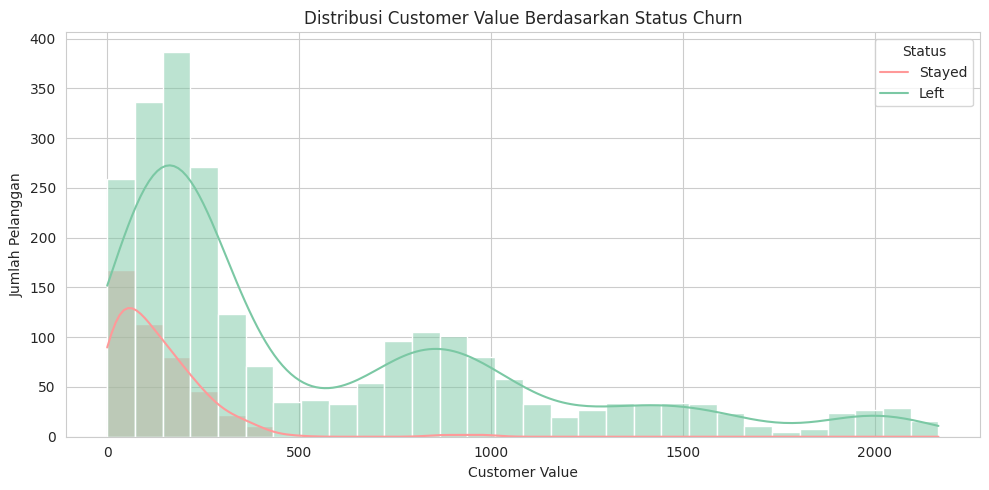

In [9]:
# @title Distribusi Customer Value Berdasarkan Status Churn
sns.histplot(data=df, x='Customer Value', hue=df['Churn'].map({0: 'Stayed', 1: 'Left'}), bins=30, kde=True, palette=['#7BC8A4', '#FF9999'])
plt.title("Distribusi Customer Value Berdasarkan Status Churn")
plt.xlabel("Customer Value")
plt.ylabel("Jumlah Pelanggan")
plt.legend(title="Status", labels=['Stayed', 'Left'])
plt.tight_layout()
plt.show()


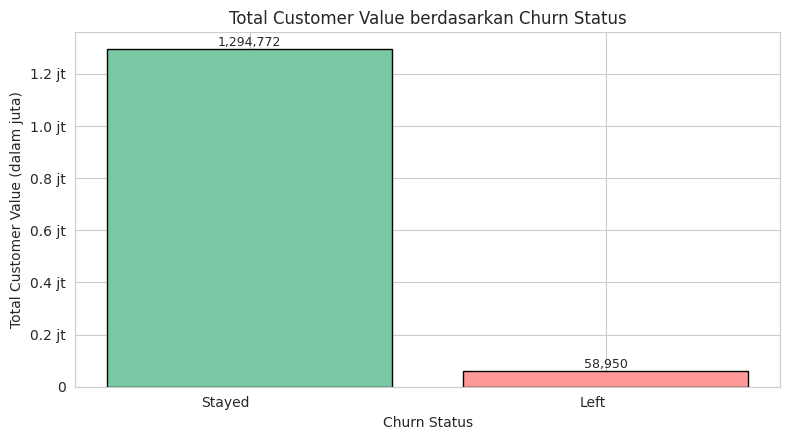

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# prepare totals (sama seperti sebelumnya)
tot = df.groupby('Churn', dropna=False)['Customer Value'].sum().reset_index()
lbl_map = column_label_map.get('Churn', {0: 'Stayed', 1: 'Left'})
tot['Churn_Label'] = tot['Churn'].map(lbl_map).fillna(tot['Churn'].astype(str))
tot = tot.set_index('Churn_Label')['Customer Value'].sort_values(ascending=False)

# formatter untuk y-axis dalam juta (jt)
def juta_formatter(x, pos):
    return f"{x/1_000_000:.1f} jt" if x != 0 else "0"

fig, ax = plt.subplots(figsize=(8, 4.5))
colors = ['#7BC8A4', '#FF9999']
bars = ax.bar(tot.index, tot.values, color=colors, edgecolor='k')

# annotate angka penuh di atas bar (format + thousand separator)
for p in bars:
    ax.annotate(f"{int(p.get_height()):,}", (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

# rotate x labels and align
plt.setp(ax.get_xticklabels(), rotation=0, ha='right')

# set y formatter to juta
ax.yaxis.set_major_formatter(FuncFormatter(juta_formatter))

ax.set_title("Total Customer Value berdasarkan Churn Status")
ax.set_xlabel("Churn Status")
ax.set_ylabel("Total Customer Value (dalam juta)")
plt.tight_layout()
plt.show()

## Engagement Score

In [11]:
import numpy as np
import pandas as pd
from scipy import linalg
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from typing import Sequence, Tuple, List, Optional

# -------------------------
# 1) KMO helper
# -------------------------
def calculate_kmo(df_num: pd.DataFrame) -> Tuple[float, pd.Series]:
    """
    Hitung KMO overall dan MSA (Measure of Sampling Adequacy) per variable.
    Input: df_num: numeric DataFrame (na diisi/selektif disarankan sebelum panggil).
    Returns: (kmo_overall, msa_series) dimana msa_series.index==df_num.columns.
    """
    X = df_num.copy().apply(pd.to_numeric, errors='coerce').dropna(axis=0, how='any')
    if X.shape[0] < 3:
        raise ValueError("Need >=3 complete rows to compute KMO.")
    R = np.corrcoef(X.values, rowvar=False)              # correlation matrix
    try:
        invR = linalg.inv(R)
    except np.linalg.LinAlgError:
        invR = linalg.pinv(R)

    p = R.shape[0]
    # build partial correlation matrix from inverse correlation
    partial = np.zeros_like(R)
    for i in range(p):
        for j in range(p):
            if i == j:
                partial[i, j] = 0.0
            else:
                denom = np.sqrt(invR[i, i] * invR[j, j])
                partial[i, j] = -invR[i, j] / denom if denom != 0 else 0.0

    corr_sq = R**2
    part_sq = partial**2

    # MSA per variable
    msa = []
    for i in range(p):
        sum_corr_sq = np.sum(corr_sq[i, :]) - corr_sq[i, i]
        sum_part_sq = np.sum(part_sq[i, :]) - part_sq[i, i]
        denom = sum_corr_sq + sum_part_sq
        msa_i = sum_corr_sq / denom if denom != 0 else 0.0
        msa.append(msa_i)
    msa_series = pd.Series(msa, index=X.columns)

    # overall KMO
    numer = np.sum(corr_sq) - np.sum(np.diag(corr_sq))
    denom_global = numer + (np.sum(part_sq) - np.sum(np.diag(part_sq)))
    kmo_overall = numer / denom_global if denom_global != 0 else 0.0

    return float(kmo_overall), msa_series


# -------------------------
# 2) PCA engagement pipeline
# -------------------------
def pca_engagement_pipeline(
    df: pd.DataFrame,
    cols: Sequence[str],
    msa_threshold: float = 0.60,
    q_segments: int = 3,
    segment_labels: Optional[Sequence[str]] = None,
    scale_pc1_01: bool = True,
    return_components: bool = False
) -> pd.DataFrame:
    """
    Buat variabel engagement berdasarkan PCA dengan langkah:
      1) hitung KMO & MSA per variabel,
      2) pilih variabel yang MSA >= msa_threshold,
      3) jalankan PCA pada variabel yang lulus,
      4) buat kolom eng_score_pca dan eng_segment (kuantil),
      5) cetak ringkasan singkat.

    Args:
      df: input DataFrame (tidak dimodifikasi kecuali kolom baru ditambahkan).
      cols: list nama kolom numeric yang menjadi kandidat.
      msa_threshold: ambang MSA untuk menyeleksi variabel (default 0.60).
      q_segments: jumlah segmen kuantil (default 3).
      segment_labels: optional labels untuk segmen; default ['Low','Medium','High'] jika q_segments==3.
      scale_pc1_01: jika True, hasil PC1 dinormalisasi ke rentang [0,1].
      return_components: jika True, fungsi mengembalikan tuple (df_out, pca, scaler, kept_vars).

    Returns:
      df_out: salinan df dengan kolom tambahan:
        - 'eng_score_pca_kmo' : skor engagement (0..1 jika scale_pc1_01 True)
        - 'eng_seg_pca_kmo' : segmen kuantil (categorical)
      Jika return_components True, juga mengembalikan objek pca, scaler, dan kept_vars.
    """
    df_work = df.copy()
    # validate columns exist
    missing = [c for c in cols if c not in df_work.columns]
    if missing:
        raise ValueError(f"Missing columns in df: {missing}")

    # prepare numeric subset (keep full rows to compute KMO)
    df_num = df_work[list(cols)].copy().apply(pd.to_numeric, errors='coerce')

    # 1) KMO
    kmo_overall, msa_series = calculate_kmo(df_num)
    print(f"KMO overall: {kmo_overall:.3f}")
    print("MSA per variable:")
    print(msa_series.round(3).to_string())
    print()

    # 2) select variables that pass MSA threshold
    kept_vars = msa_series[msa_series >= msa_threshold].index.tolist()
    dropped_vars = msa_series[msa_series < msa_threshold].index.tolist()
    print(f"MSA threshold: {msa_threshold:.2f}")
    print("Kept vars for PCA:", kept_vars)
    print("Dropped vars (low MSA):", dropped_vars)
    print()

    if len(kept_vars) < 2:
        raise ValueError("Tidak cukup variabel berkualitas untuk PCA setelah filter MSA. Turunkan threshold atau tambahkan variabel lain.")

    # 3) PCA on kept vars
    X = df_work[kept_vars].copy().apply(pd.to_numeric, errors='coerce').fillna(0.0).values
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X)

    pca = PCA(n_components=1, random_state=0)
    pc1 = pca.fit_transform(Xs).flatten()
    loadings = pca.components_[0]
    explained_var = float(pca.explained_variance_ratio_[0])

    # 4) scale PC1 to [0,1] if requested
    if scale_pc1_01:
        if pc1.max() == pc1.min():
            pc1_scaled = np.zeros_like(pc1)
        else:
            pc1_scaled = (pc1 - pc1.min()) / (pc1.max() - pc1.min())
    else:
        pc1_scaled = pc1

    df_work['eng_score_pca'] = pc1_scaled

    # 5) print summary
    print("PCA (PC1) summary on KMO-filtered vars")
    print("-" * 50)
    print(f"Explained variance (PC1): {explained_var:.3f}")
    print("\nLoadings (PC1):")
    for name, load in zip(kept_vars, loadings):
        print(f" - {name}: {load:.4f}")

    if return_components:
        return df_work, pca, scaler, kept_vars
    return df_work


# -------------------------
# Example usage (langsung)
# -------------------------
cols = ["Seconds of Use", "Frequency of use", "Distinct Called Numbers"]
df_out = pca_engagement_pipeline(df, cols, msa_threshold=0.50, q_segments=3, scale_pc1_01=True)
display(df_out[['eng_score_pca']].head())


KMO overall: 0.659
MSA per variable:
Seconds of Use             0.623
Frequency of use           0.597
Distinct Called Numbers    0.857

MSA threshold: 0.50
Kept vars for PCA: ['Seconds of Use', 'Frequency of use', 'Distinct Called Numbers']
Dropped vars (low MSA): []

PCA (PC1) summary on KMO-filtered vars
--------------------------------------------------
Explained variance (PC1): 0.857

Loadings (PC1):
 - Seconds of Use: 0.5916
 - Frequency of use: 0.6041
 - Distinct Called Numbers: 0.5340


,eng_score_pca
0,0.234078
1,0.027439
2,0.213228
3,0.293768
4,0.244179


In [12]:
df_out

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn,eng_score_pca
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0,0.234078
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0,0.027439
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0,0.213228
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0,0.293768
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0,0.244179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0,0.553185
3097,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0,0.202244
3099,8,1,11,2,1792,25,7,9,3,1,1,30,100.680,1,0.098427
3123,26,0,38,9,10740,99,8,44,5,2,1,55,174.585,0,0.485452


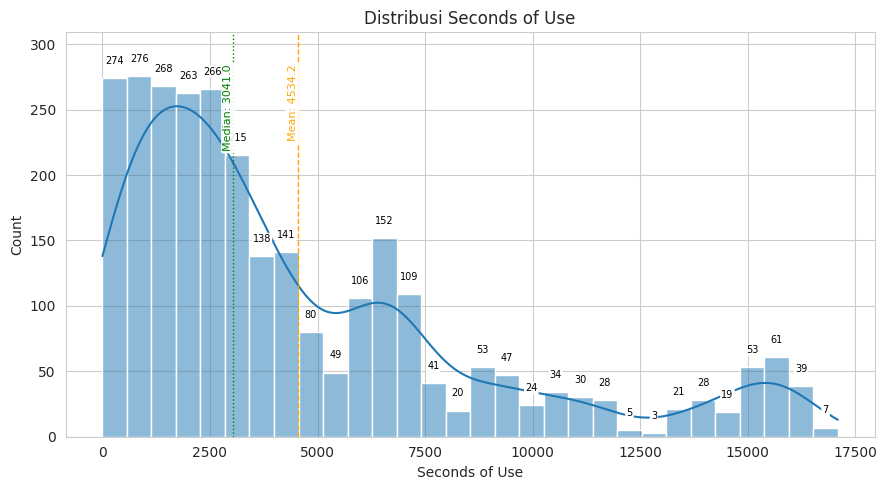

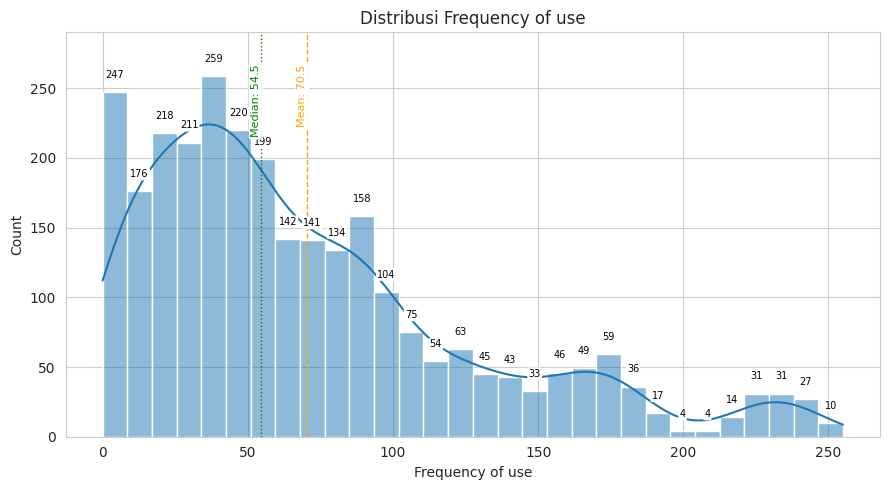

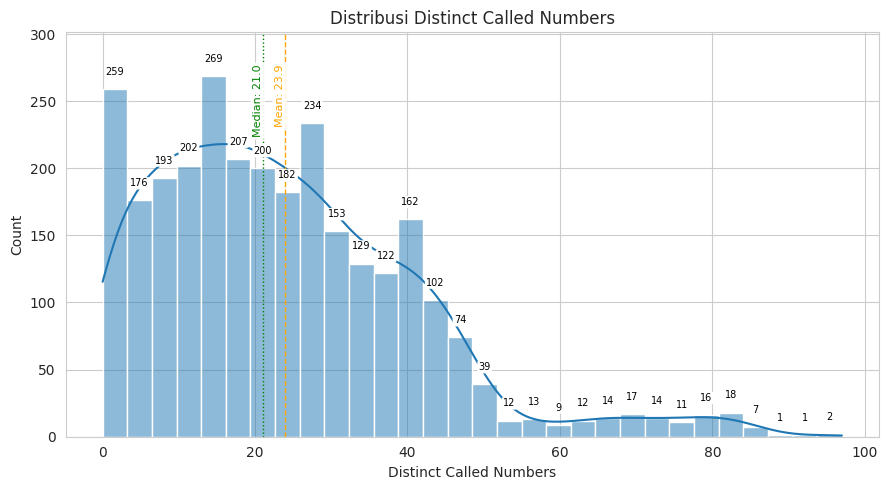

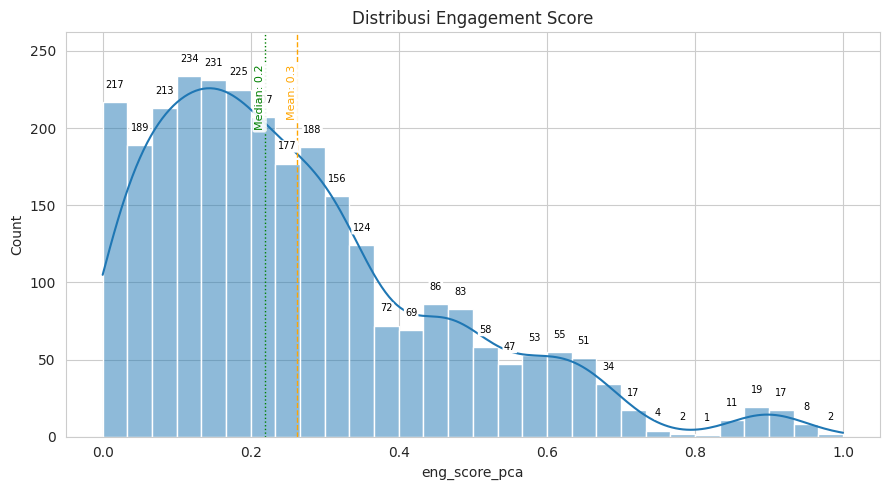

(<Figure size 900x500 with 1 Axes>,
 <Axes: title={'center': 'Distribusi Engagement Score'}, xlabel='eng_score_pca', ylabel='Count'>)

In [13]:
# @title Distribution of Engagement Score (PCA)

plot_histogram_series(df_out['Seconds of Use'], title="Distribusi Seconds of Use", bins=30)
plot_histogram_series(df_out['Frequency of use'], title="Distribusi Frequency of use", bins=30)
plot_histogram_series(df_out['Distinct Called Numbers'], title="Distribusi Distinct Called Numbers", bins=30)
plot_histogram_series(df_out['eng_score_pca'], title="Distribusi Engagement Score", bins=30)

## Technical Issues: The Frustration Factor

/tmp/ipython-input-1697078771.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby('fail_bucket').agg(


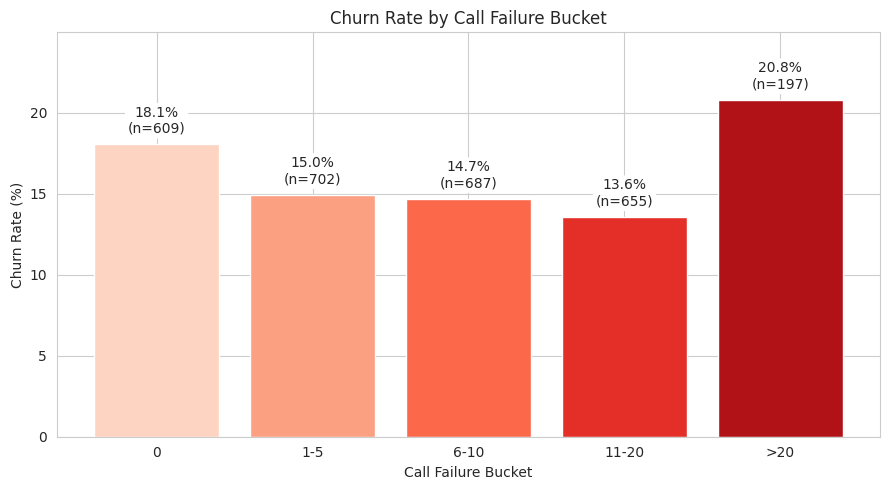

In [14]:
bins = [-1, 0, 5, 10, 20, np.inf]
labels = ['0', '1-5', '6-10', '11-20', '>20']
df['fail_bucket'] = pd.cut(df['Call  Failure'], bins=bins, labels=labels)

summary = df.groupby('fail_bucket').agg(
    customers=('Call  Failure','count'),
    churners=('Churn','sum'),
)
summary['churn_rate'] = summary['churners'] / summary['customers'] * 100
summary = summary.reset_index()

# plot churn rate per bucket (bar)
fig, ax = plt.subplots(figsize=(9,5))
bars = ax.bar(summary['fail_bucket'].astype(str), summary['churn_rate'], color=sns.color_palette("Reds", n_colors=len(summary)))
# annotate percent and counts
for rect, cr, cnt in zip(bars, summary['churn_rate'], summary['customers']):
    h = rect.get_height()
    ax.annotate(f"{cr:.1f}%\n(n={int(cnt)})",
                xy=(rect.get_x() + rect.get_width()/2, h),
                xytext=(0,6),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none"))
ax.set_ylim(0, max(summary['churn_rate']) * 1.2)
ax.set_title('Churn Rate by Call Failure Bucket')
ax.set_xlabel('Call Failure Bucket')
ax.set_ylabel('Churn Rate (%)')
plt.tight_layout()
plt.show()

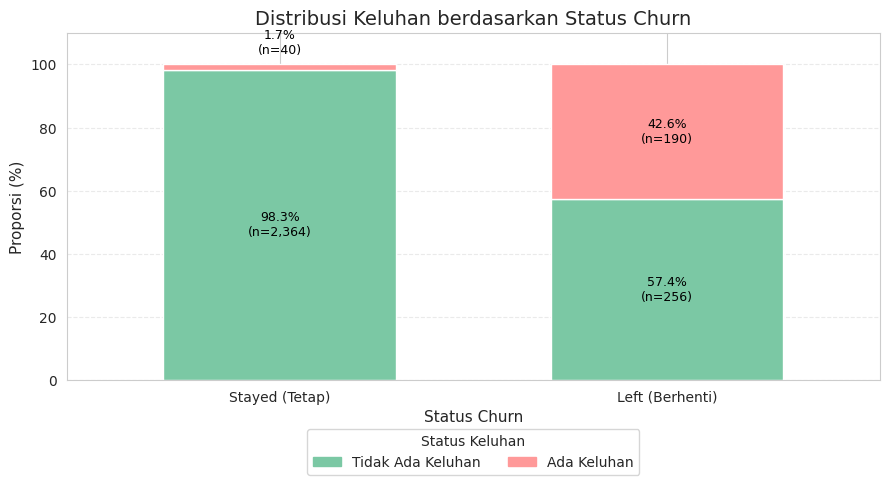

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# mapping label (ubah kalau perlu)
churn_map = {0: "Stayed (Tetap)", 1: "Left (Berhenti)"}
complain_map = {0: "Tidak Ada Keluhan", 1: "Ada Keluhan"}

# contingency table (counts) dan persen per bar
ct_counts = pd.crosstab(df['Churn'], df['Complains']).sort_index()
ct_pct = ct_counts.div(ct_counts.sum(axis=1), axis=0) * 100  # persen per bar

# warna (urut sesuai kolom ct_pct.columns: 0 then 1)
colors = ['#7BC8A4', '#FF9999']

fig, ax = plt.subplots(figsize=(9,5))
bars = ct_pct.plot(kind='bar', stacked=True, color=colors, ax=ax, width=0.6, legend=False)

# labels & axes
ax.set_title("Distribusi Keluhan berdasarkan Status Churn", fontsize=14)
ax.set_xlabel("Status Churn", fontsize=11)
ax.set_ylabel("Proporsi (%)", fontsize=11)
ax.set_ylim(0, 110)   # beri ruang untuk label kecil di atas bar
ax.set_xticklabels([churn_map.get(i, str(i)) for i in ct_pct.index], rotation=0)

# annotate each stacked segment
for i, (idx, row) in enumerate(ct_pct.iterrows()):
    cum = 0.0
    for j, col in enumerate(ct_pct.columns):
        val_pct = row[col]
        count = int(ct_counts.loc[idx, col])
        if val_pct <= 0:
            cum += val_pct
            continue

        inside_threshold = 8.0  # persen
        if val_pct >= inside_threshold:
            y = cum + val_pct / 2.0
            va = 'center'
            color = 'black'
        else:
            y = cum + val_pct + 2.5
            va = 'bottom'
            color = 'black'
            if y > ax.get_ylim()[1] - 3:
                ax.set_ylim(0, max(ax.get_ylim()[1], y + 6))

        text = f"{val_pct:.1f}%\n(n={count:,})"
        ax.text(i, y, text, ha='center', va=va, fontsize=9, color=color, clip_on=False)
        cum += val_pct

# grid
ax.yaxis.grid(True, linestyle='--', alpha=0.4)

# === Tambahkan legend di sini ===
handles = [plt.Rectangle((0,0),1,1, color=colors[k]) for k in range(len(ct_pct.columns))]
labels = [complain_map.get(k, str(k)) for k in ct_pct.columns]
ax.legend(handles, labels, title="Status Keluhan", loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=len(labels), frameon=True)

plt.tight_layout()
plt.show()

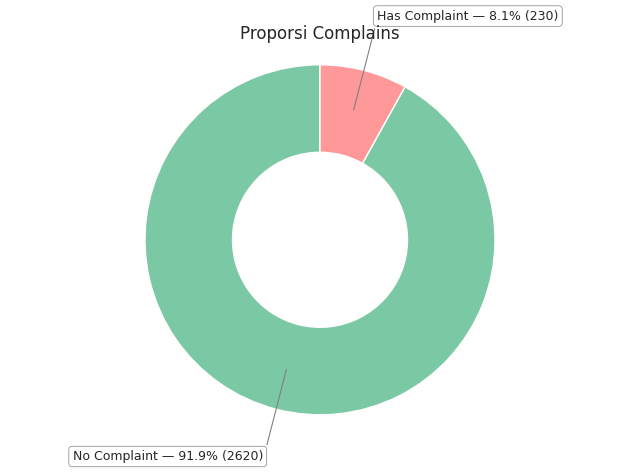

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Proporsi Complains'}>)

In [16]:
plot_binary_pie(df['Complains'], title="Proporsi Complains", label_map=column_label_map.get('Complains'), palette=['#7BC8A4', '#FF9999'])

## What are the most influential factors?

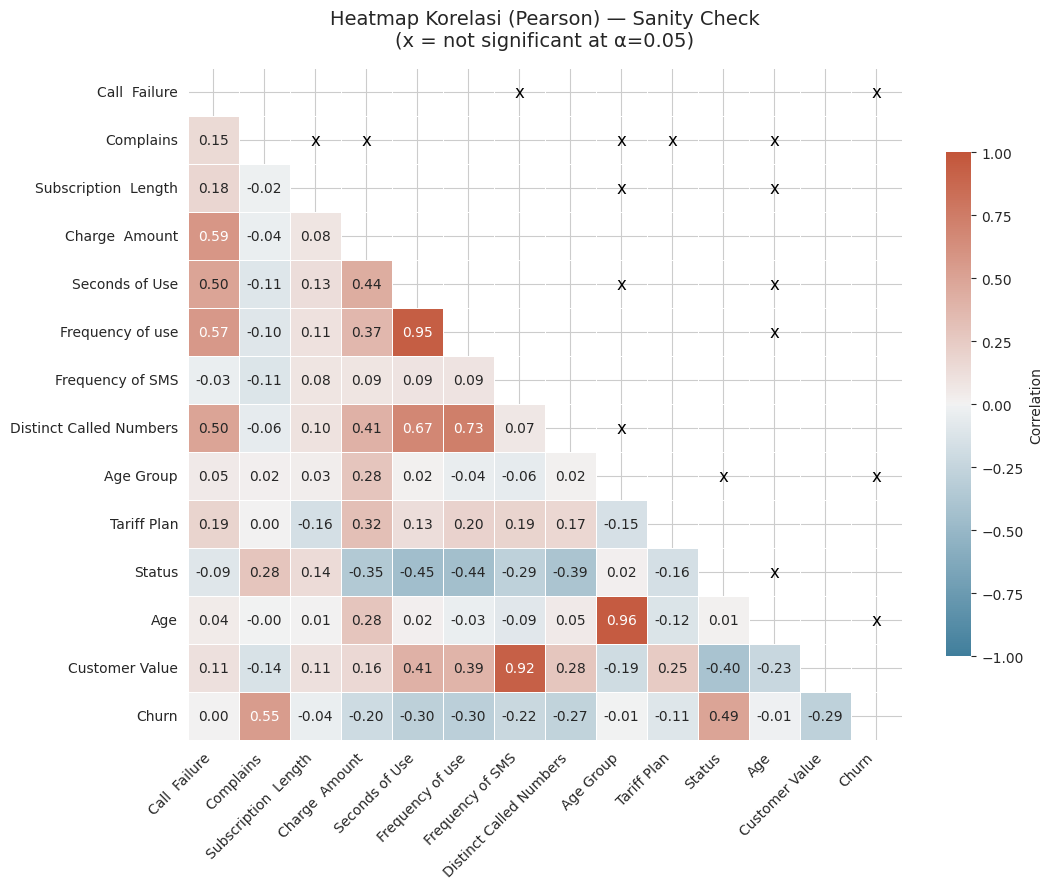

In [17]:
# Correlation heatmap (sanity check) - ready to run in Jupyter / Colab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# CONFIG
method = 'pearson'   # 'pearson' or 'spearman'
alpha = 0.05         # threshold for significance (p-value)
save_fig = False     # ubah ke True untuk menyimpan file
fig_fname = "correlation_heatmap.png"

# Select numeric columns only (include churn)
num_df = df.select_dtypes(include=[np.number]).copy()

# Optional: drop identifier-like columns if any (uncomment / edit)
# drop_cols = ['customer_id']
# num_df = num_df.drop(columns=[c for c in drop_cols if c in num_df.columns])

# 1) compute correlation matrix
if method == 'pearson':
    corr = num_df.corr(method='pearson')
else:
    corr = num_df.corr(method='spearman')

# 2) compute p-value matrix for Pearson (approx via scipy) or Spearman
cols = num_df.columns
pvals = pd.DataFrame(np.ones((len(cols), len(cols))), index=cols, columns=cols)

for i, ci in enumerate(cols):
    for j, cj in enumerate(cols):
        if i >= j:
            # two-sided test
            try:
                if method == 'pearson':
                    r, p = stats.pearsonr(num_df[ci].dropna(), num_df[cj].dropna())
                else:
                    r, p = stats.spearmanr(num_df[ci].dropna(), num_df[cj].dropna())
            except Exception:
                r, p = (np.nan, 1.0)
            pvals.loc[ci, cj] = p
            pvals.loc[cj, ci] = p

# 3) mask the upper triangle (we'll show lower triangle to avoid duplicate values)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 4) plot
plt.figure(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)  # blue <-> red diverging

ax = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1.0,
    vmin=-1.0,
    center=0,
    annot=True,
    fmt=".2f",
    square=False,
    linewidths=.5,
    cbar_kws={"shrink": .75, "label": "Correlation"}
)

# 5) annotate insignificance with 'x' (where p > alpha)
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        p = pvals.iloc[i, j]
        if p > alpha:
            # coordinates are j, i on heatmap because of mask and orientation
            ax.text(j + 0.5, i + 0.5, 'x', color='black', ha='center', va='center', fontsize=12)

# cosmetics
plt.title(f'Heatmap Korelasi ({method.capitalize()}) — Sanity Check\n(x = not significant at α={alpha})', fontsize=14, pad=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

if save_fig:
    plt.savefig(fig_fname, dpi=300, bbox_inches='tight')
    print(f"Saved figure to {fig_fname}")

plt.show()
